In [1]:
from adaboost import AdaBoost
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../../../data/breast-cancer-wisconsin.csv')

In [3]:
y = df['diagnosis'].map({'M': 1, 'B': 0}).values
X = df.drop(columns=['id', 'diagnosis']).values
X_train,X_test,y_train,y_test = \
    train_test_split(X,y,test_size=.3,random_state=41,stratify=y)

In [4]:
sk_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=55,
    learning_rate=.666,
    algorithm='SAMME'
    )
sk_clf.fit(X_train, y_train)
sk_acc = np.mean(sk_clf.predict(X_test) == y_test)

In [5]:
my_clf = AdaBoost(lr=.666, n_estimators=55)
my_clf.fit(X_train, y_train)
my_acc = np.mean(my_clf.predict(X_test) == y_test)

KeyboardInterrupt: 

In [ ]:
train_sc_hist = []
test_sc_hist = []
import tqdm

for i in tqdm.tqdm(range(1,55)):

    my_clf.set_params(n_estimators=i)
    my_clf.fit(X_train, y_train)
    y_train_pred = my_clf.predict(X_train)
    y_test_pred = my_clf.predict(X_test)
    train_sc_hist.append(accuracy_score(y_train, y_train_pred))
    test_sc_hist.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 54/54 [03:41<00:00,  4.09s/it]


In [ ]:
sk_train_sc_hist = []
sk_test_sc_hist = []
for i in range(1, 55):
    sk_clf.set_params(n_estimators=i)
    sk_clf.fit(X_train, y_train)
    y_train_pred = sk_clf.predict(X_train)
    y_test_pred = sk_clf.predict(X_test)
    sk_train_sc_hist.append(accuracy_score(y_train, y_train_pred))
    sk_test_sc_hist.append(accuracy_score(y_test, y_test_pred))

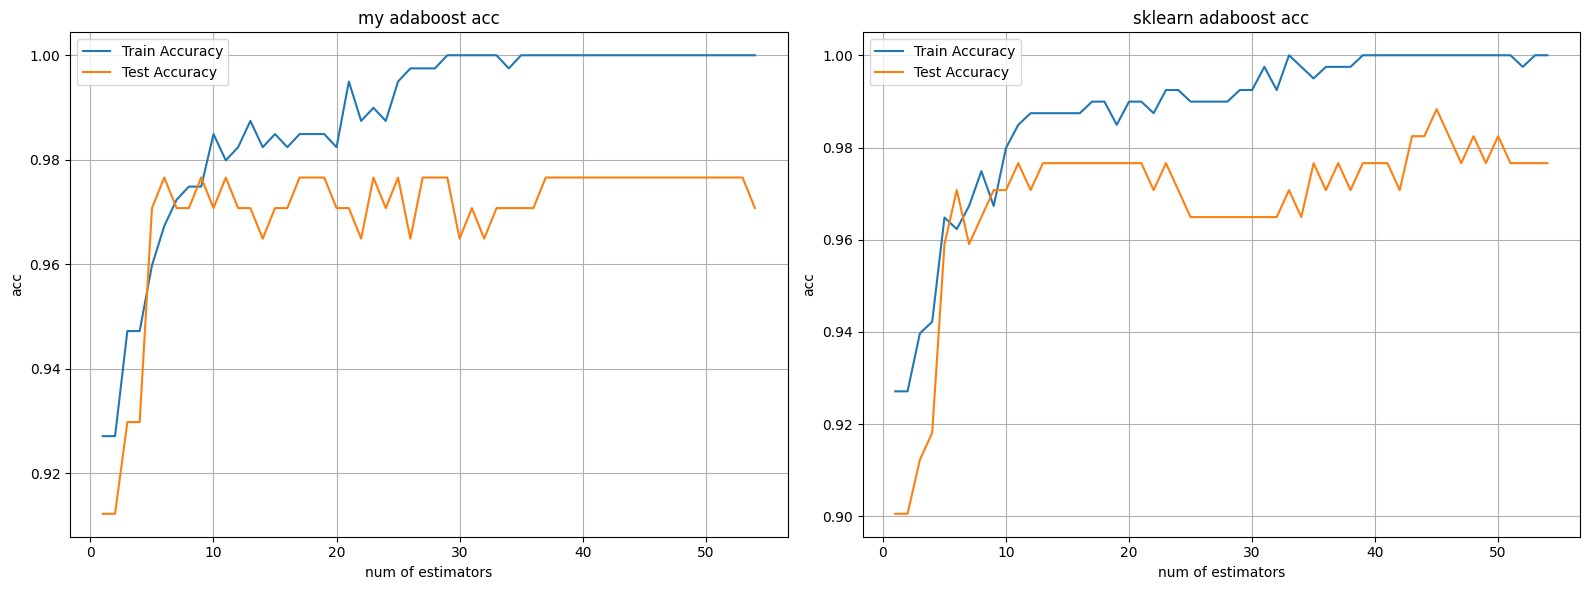

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(range(1, 55), train_sc_hist, label='Train Accuracy')
axes[0].plot(range(1, 55), test_sc_hist, label='Test Accuracy')
axes[0].set_title('my adaboost acc')
axes[0].set_xlabel('num of estimators')
axes[0].set_ylabel('acc')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(range(1, 55), sk_train_sc_hist, label='Train Accuracy')
axes[1].plot(range(1, 55), sk_test_sc_hist, label='Test Accuracy')
axes[1].set_title('sklearn adaboost acc')
axes[1].set_xlabel('num of estimators')
axes[1].set_ylabel('acc')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

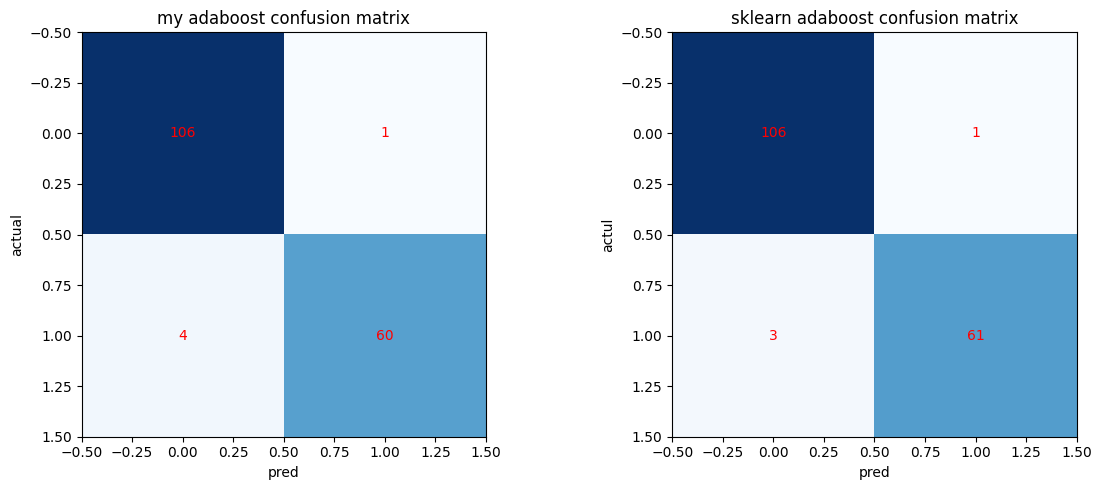

In [ ]:
from sklearn.metrics import confusion_matrix
my_conf_matrix = confusion_matrix(y_test, my_clf.predict(X_test))
sk_conf_matrix = confusion_matrix(y_test, sk_clf.predict(X_test))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(my_conf_matrix, cmap='Blues')
axes[0].set_title('my adaboost confusion matrix')
axes[0].set_xlabel('pred')
axes[0].set_ylabel('actual')
for i in range(my_conf_matrix.shape[0]):
    for j in range(my_conf_matrix.shape[1]):
        axes[0].text(j, i, my_conf_matrix[i, j], ha='center', va='center', color='red')


axes[1].imshow(sk_conf_matrix, cmap='Blues')
axes[1].set_title('sklearn adaboost confusion matrix')
axes[1].set_xlabel('pred')
axes[1].set_ylabel('actul')
for i in range(sk_conf_matrix.shape[0]):
    for j in range(sk_conf_matrix.shape[1]):
        axes[1].text(j, i, sk_conf_matrix[i, j], ha='center', va='center', color='red')

plt.tight_layout()
plt.show()